# Advanced Pipelines

We now have a pretty strong repetoire of regression models. Depending on the data set there may be a number of preprocessing steps that should be taken prior to fitting the model. While we've learned basic pipelines and out of the box transformer objects you may need to perform preprocessing tasks that are too complicated for these simple tools.

## What We'll Accomplish in This Notebook

- We'll review the differences and necessity for fit, transform and fit_transform
- Introduce the popular California Housing Data Set
- Demonstrate how to construct custom transformer objects for more advanced pipelines

In [2]:
## Import packages

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## `fit`, `transform`, and `fit_transform`

Hopefully you remember from the `Basic Pipelines` notebook the terms, `fit`, `transform` and `fit_transform`. Let's return to the `StandardScaler` object as a reminder.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</a>

In [3]:
from sklearn.preprocessing import StandardScaler

From the documentation listed above we know that the standard scaler will take in the features, `X`, and scale them like so:
$$
\frac{X_i - \overline{X_i}}{s_{X_i}}.
$$

Let's generate some data.

In [4]:
X = 10*np.random.randn(100,1)-5

In [5]:
print("The mean of X is",np.mean(X))
print("The variance of X is",np.var(X))

The mean of X is -4.637962480205209
The variance of X is 113.07071862638341


Now we'll scale $X$.

In [6]:
## first we make a scaler object
scaler = StandardScaler()

In [7]:
## Then we fit it
scaler.fit(X)

print("The scaler was fit to have mean",scaler.mean_)
print("and variance",scaler.var_)

The scaler was fit to have mean [-4.63796248]
and variance [113.07071863]


In [8]:
## The we transform the data, aka scale it
X_scaled = scaler.transform(X)

In [9]:
print("The mean of X is",np.mean(X_scaled))
print("The standard deviation of X is",np.std(X_scaled))

The mean of X is 2.4424906541753444e-17
The standard deviation of X is 0.9999999999999999


Now let's imagine we're ready to check the test error on our model. So we have to scale the test features.

In [10]:
X_test = 10*np.random.randn(100,1)-5.1

In [11]:
np.shape(X_test)

(100, 1)

In [12]:
print("The mean of X_test is",np.mean(X_test))
print("The variance of X_test is",np.var(X_test))

The mean of X_test is -3.18717080849431
The variance of X_test is 111.89226947019259


Now what code should we write to scale the test data?

In [13]:
X_test_scaled = scaler.transform(X_test)

print(np.mean(X_test_scaled))

print(np.var(X_test_scaled))

0.13643631393267291
0.9895777689351671


The order in which these sorts of steps gets done is important. 

This is because you only fit the model on the training data, and the scaler (and other preprocessing steps) is thought of as part of the model. 

Let's do a short practice

### You Code

#### A New Scaler

Go to the documentation and read about the `MinMaxScaler` object, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html</a>.

Use the `MinMaxScaler` to scale the following training and test data.

In [14]:
## Your train and test data
X_train = np.random.randint(1,1000,1000)
X_test = np.random.randint(1,1000,1000)

In [15]:
## Import MinMaxScaler here

## Sample Answer
from sklearn.preprocessing import MinMaxScaler

In [25]:
## Fit and transform the training and test data 
## using a MinMaxScaler here

## Sample Answer
min_max = MinMaxScaler()

print("The min of X_train is",np.min(X_train))
print("The max of X_train is",np.max(X_train))

min_max.fit(X_train.reshape(-1,1))

X_train_scaled = min_max.transform(X_train.reshape(-1,1))

print("The min of scaled X_train is",np.min(X_train_scaled))
print("The max of scaled X_train is",np.max(X_train_scaled))

print()
print()

print("The min of X_test is",np.min(X_test))
print("The max of X_test is",np.max(X_test))

X_test_scaled = min_max.transform(X_test.reshape(-1,1))

print("The min of scaled X_test is",np.min(X_test_scaled))
print("The max of scaled X_test is",np.max(X_test_scaled))



The min of X_train is 2
The max of X_train is 999
The min of scaled X_train is 0.0
The max of scaled X_train is 1.0


The min of X_test is 1
The max of X_test is 999
The min of scaled X_test is -0.0010030090270812437
The max of scaled X_test is 1.0


#### Imputing Values

Sometimes your data may have missing values. It is often bad practice to throw away missing values, one option is to instead <i>impute</i> them.

Imputation is when you use the non-missing values to fill in the missing values. Three simple ways would be to replace the missing values with the mean, median, or mode of the training data.

Here is the documentation on the `SimpleImputer`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html</a>.

We'll now impute the missing values on the following data using the median of the data.

In [16]:
## Here is some data
X_train = np.random.randn(1000)
X_test = np.random.randn(1000)

## With some values missing
X_train[np.random.choice(range(1000),20)] = np.nan
X_test[np.random.choice(range(1000),20)] = np.nan

In [18]:
## Import the SimpleImputer
from sklearn.impute import SimpleImputer

In [19]:
## Make the imputer object with the desired "strategy"
imp = SimpleImputer(strategy = 'median')

print("X_train has", sum(np.isnan(X_train)), "missing values.")

## impute the missing values

# first fit the imputer
imp.fit(X_train.reshape(-1,1))

# then transform
X_train_imp = imp.transform(X_train.reshape(-1,1))

print("After imputing X_train has", sum(np.isnan(X_train_imp)), "missing values.")



X_train has 20 missing values.
After imputing X_train has [0] missing values.


In [20]:
## Now impute on the test data
## note that we don't use the "fit" step here
print("X_test has", sum(np.isnan(X_test)), "missing values.")

X_test_imp = imp.transform(X_test.reshape(-1,1))

print("After imputing X_test has", sum(np.isnan(X_test_imp)), "missing values.")

X_test has 20 missing values.
After imputing X_test has [0] missing values.


## The California Housing Data Set

We'll now introduce a popular machine learning data set, the California Housing data set. The data is used in the book <a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Hands-On Machine Learning with Scikit-Learn and TensorFlow</a> as an example of a machine learning workflow. This is an excellent book and a useful reference if you're looking to purchase a book about machine learning with python.

We won't be using this data to build a predictive model, but rather to demonstrate the need for advanced pipelines.

In [21]:
## Read the data
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [22]:
df_train = df.copy().sample(frac=.75, random_state = 440)
df_test = df.copy().drop(df_train.index)

In [23]:
## Let's look at the dataframe info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 7784 to 1973
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15328 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [24]:
## What kind of categories are possible for ocean proximity?
df_train.ocean_proximity.value_counts()

<1H OCEAN     6839
INLAND        4926
NEAR OCEAN    1998
NEAR BAY      1714
ISLAND           3
Name: ocean_proximity, dtype: int64

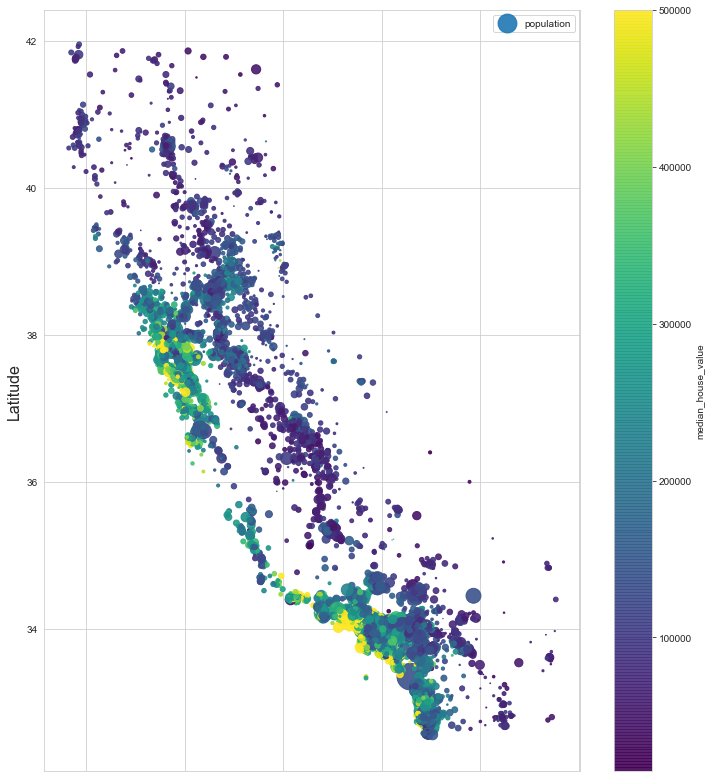

In [25]:
## Each dot is at it's longitude and latitude
## the size of the dot is proportional to its population
## the color of the dot represents the median_house_value of the dot
df_train.plot(kind="scatter", x = "longitude", y = "latitude",
             alpha = .9, s = df_train["population"]/50, label="population",
             figsize=(12,14), c="median_house_value",cmap = plt.get_cmap("viridis"), 
             colorbar=True)

plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

plt.show()

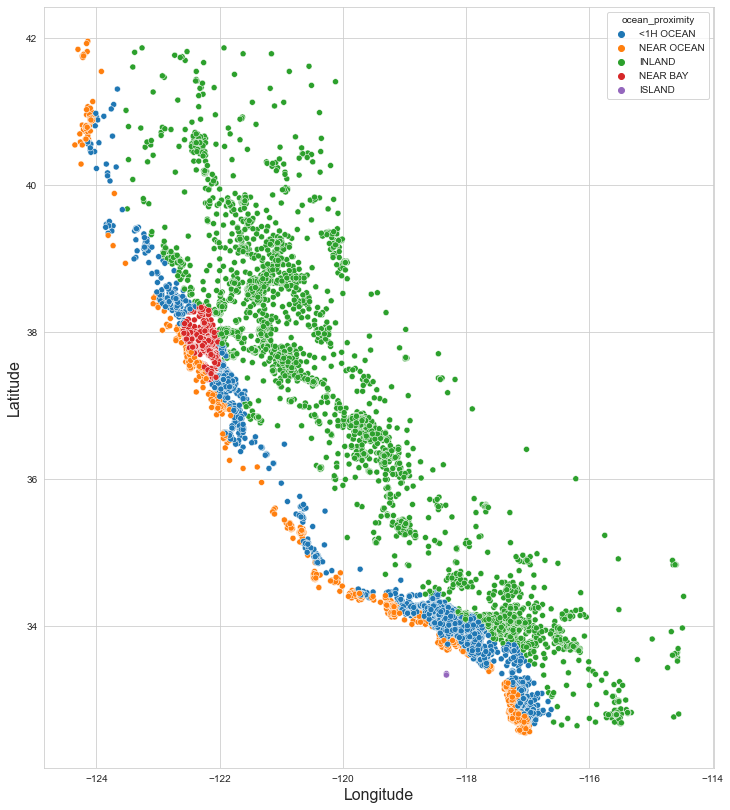

In [26]:
plt.figure(figsize=(12,14))
sns.scatterplot(data=df_train,x="longitude",y="latitude",hue="ocean_proximity")

plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

plt.show()

Now from our exploration of the data we can see that this data set has a number of preprocessing steps:
1. `total_bedrooms` has a number of missing values that could be imputed
2. `ocean_proximity` needs to be one-hot-encoded
3. Many columns have vastly differing scales, so we should scale them
4. We may want to create additional features from our other features.

Now we'll review how to do 1. and 2. then it will be your job to incorporate 3. and 4. 

As we go through let's remember two main points:
- Fitting should only be performed on the training set
- A good pipeline takes in the features and target without any preprocessing and outputs the fit or prediction

#### Imputing `total_bedrooms`

Recall that we only want to impute the column for `total_bedrooms`. If we were to put `SimpleImputer` as is into the pipeline we'd be imputing the entire dataframe. While this isn't an issue for this dataset (because only `total_bedrooms` is missing data), it's an excellent time to introduce how you can create a custom imputer object.

`sklearn` is quite nice because it gives us the functionality to make custom transformers relatively easily. To do this we make our own transformer object. 

To fully grasp everything going on check out the bonus content notebook in the `python prep` folder where I review objects and classes in python. If you're happy just copying and pasting the code for your own transformers (no shame in that for now, we're learning a lot of data science) no need to read through those notes.

In [27]:
## We'll need these
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

A python object is an instance of a python class.

Below we define our `BedroomImputer` class.

In [28]:
## Define our custom imputer
class BedroomImputer(BaseEstimator, TransformerMixin):
    # Class Constructor 
    # This allows you to initiate the class when you call
    # BedroomImputer
    def __init__(self):
        # I want to initiate each object with
        # the SimpleImputer method
        self.SimpleImputer = SimpleImputer(strategy = "median")
    
    # For my fit method I'm just going to "steal"
    # SimpleImputer's fit method using only the
    # 'total_bedrooms' column
    def fit(self, X, y = None ):
        self.SimpleImputer.fit(X['total_bedrooms'].values.reshape(-1,1))
        return self
    
    # Now I want to transform the total_bedrooms columns
    # and return it with imputed values
    def transform(self, X, y = None):
        copy_X = X.copy()
        copy_X['total_bedrooms'] = self.SimpleImputer.transform(copy_X['total_bedrooms'].values.reshape(-1,1))
        return copy_X

We now have a custom imputer let's put it to work.

In [29]:
imputer = BedroomImputer()

In [30]:
df_train.total_bedrooms.describe()

count    15328.000000
mean       535.808847
std        417.816731
min          1.000000
25%        295.000000
50%        433.000000
75%        646.250000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [31]:
imputer.fit(df_train)

imputer.transform(df_train).total_bedrooms.describe()

imputer.fit_transform(df_train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7784,-118.07,33.91,35.0,2228.0,463.0,1558.0,427.0,4.0230,157700.0,<1H OCEAN
20175,-119.15,34.30,21.0,2475.0,502.0,1269.0,505.0,2.9800,259200.0,NEAR OCEAN
11728,-120.02,39.24,32.0,1347.0,444.0,825.0,303.0,1.8269,225000.0,INLAND
16276,-121.26,37.93,33.0,2109.0,531.0,2248.0,588.0,1.4583,53000.0,INLAND
5847,-118.30,34.18,5.0,5492.0,1549.0,2997.0,1405.0,3.3205,172100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5637,-118.30,33.75,19.0,2356.0,440.0,1291.0,418.0,4.2308,416100.0,<1H OCEAN
17202,-119.73,34.44,38.0,1729.0,433.0,801.0,395.0,3.1364,357500.0,NEAR OCEAN
13847,-117.34,34.49,9.0,3293.0,585.0,1678.0,530.0,3.2941,98300.0,INLAND
3270,-122.99,39.02,14.0,1582.0,301.0,851.0,273.0,3.4500,164100.0,<1H OCEAN


#### One-Hot-Encoding `ocean_proximity`

Now let's see how we can one-hot-encode `ocean_proximity`.

Here we can use the `FunctionTransformer` object.

In [32]:
from sklearn.preprocessing import FunctionTransformer

In [33]:
# define our preprocessing function
# This creates bedrooms_per_room
# and one hot encodes ocean_proximity
def one_hot_encode(df):
    df_copy = df.copy()
    
    hot_encoding = pd.get_dummies(df_copy['ocean_proximity'])
    df_copy[hot_encoding.columns[:-1]] = hot_encoding[hot_encoding.columns[:-1]]
    
    return df_copy

In [34]:
one_hot = FunctionTransformer(one_hot_encode)

In [35]:
one_hot.transform(df_train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY
7784,-118.07,33.91,35.0,2228.0,463.0,1558.0,427.0,4.0230,157700.0,<1H OCEAN,1,0,0,0
20175,-119.15,34.30,21.0,2475.0,502.0,1269.0,505.0,2.9800,259200.0,NEAR OCEAN,0,0,0,0
11728,-120.02,39.24,32.0,1347.0,444.0,825.0,303.0,1.8269,225000.0,INLAND,0,1,0,0
16276,-121.26,37.93,33.0,2109.0,531.0,2248.0,588.0,1.4583,53000.0,INLAND,0,1,0,0
5847,-118.30,34.18,5.0,5492.0,1549.0,2997.0,1405.0,3.3205,172100.0,<1H OCEAN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,-118.30,33.75,19.0,2356.0,440.0,1291.0,418.0,4.2308,416100.0,<1H OCEAN,1,0,0,0
17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN,0,0,0,0
13847,-117.34,34.49,9.0,3293.0,585.0,1678.0,530.0,3.2941,98300.0,INLAND,0,1,0,0
3270,-122.99,39.02,14.0,1582.0,301.0,851.0,273.0,3.4500,164100.0,<1H OCEAN,1,0,0,0


Great!

Now it's your turn.

### You Code

Your boss has told you that her end goal is to regress `median_house_value` on `median_income`, `ocean_proximity`, and a new feature, `bedrooms_per_room`.

Write a function called `get_feats` that takes in a feature dataframe and returns the columns for `median_income` the one-hot-encoded `ocean_proximity`, and `bedrooms_per_room`. Feel free to use the function, `one_hot_encode` or not. Then create a `FunctionTransformer` object using `get_feats`, check to make sure that running `df_train` through your transformer object returns a dataframe with the desired columns, i.e. `median_income`, the one-hot-encoded `ocean_proximity` and `bedrooms_per_room`.

In [41]:
# df should hold the features not the target
def get_feats(df):
    # make a copy of the dataframe
    # I'll assume that I've already created the 
    # one-hot-encoded columns
    df_copy = df.copy()
    
    # calculate bedrooms_per_room
    df_copy['bedrooms_per_room'] = df_copy['total_bedrooms']/df_copy['total_rooms']
    
    return df_copy[['median_income', 'bedrooms_per_room', '<1H OCEAN', 
                    'INLAND','ISLAND', 'NEAR BAY']]

In [42]:
## Code here
test_transformer = FunctionTransformer(get_feats)


test_df = one_hot.transform(df_train)

test_transformer.transform(test_df)


,median_income,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY
7784,4.0230,0.207810,1,0,0,0
20175,2.9800,0.202828,0,0,0,0
11728,1.8269,0.329621,0,1,0,0
16276,1.4583,0.251778,0,1,0,0
5847,3.3205,0.282047,1,0,0,0
...,...,...,...,...,...,...
5637,4.2308,0.186757,1,0,0,0
17202,3.1364,NaN,0,0,0,0
13847,3.2941,0.177650,0,1,0,0
3270,3.4500,0.190265,1,0,0,0


Now you remember that it's important to scale the data prior to fitting your model. However, you only want to scale the columns for `median_income` and `bedrooms_per_room`, not the one-hot-encoded columns. Following the approach we took for `BedroomImputer` define a custom scaler called, `NumericScale` that takes in the dataframe produced by get_feats and scales the `median_income` and `bedrooms_per_room` columns. Hint: use `StandardScaler` in a manner similar to how `SimpleImputer` was used above.

In [43]:
## Below is a SAMPLE SOLUTION

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
## Code here
# Define our custom Scaler
class NumericScale(BaseEstimator, TransformerMixin):
    #Class Constructor 
    # This allows you to initiate the class when you call
    # NumericScale
    def __init__(self):
        # I want to initiate each object with
        # the StandardScaler
        self.StandardScaler = StandardScaler()
    
    # For my fit method I'm just going to "steal"
    # StandardScaler's fit method using only the
    # 'median_income' and 'bedrooms_per_room' columns
    def fit(self, X, y = None ):
        self.StandardScaler.fit(X[['median_income', 'bedrooms_per_room']])
        return self
    
    # Now I want to transform the 'median_income' and
    # 'bedrooms_per_room' columns and return it with scaled values
    def transform(self, X, y = None):
        copy_X = X.copy()
        copy_X[['median_income', 'bedrooms_per_room']] = \
                self.StandardScaler.transform(copy_X[['median_income', 'bedrooms_per_room']])
        return copy_X

In [46]:
## Code here
# I'll test the scaler here!
test_scale = NumericScale()
test_scale.fit_transform(test_transformer.transform(test_df)).describe()

,median_income,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY
count,1.548000e+04,1.532800e+04,15480.000000,15480.000000,15480.000000,15480.000000
mean,-2.074138e-16,-1.743278e-16,0.441796,0.318217,0.000194,0.110724
std,1.000032e+00,1.000033e+00,0.496617,0.465799,0.013920,0.313800
min,-1.773988e+00,-1.945958e+00,0.000000,0.000000,0.000000,0.000000
25%,-6.864262e-01,-6.455718e-01,0.000000,0.000000,0.000000,0.000000
50%,-1.737395e-01,-1.660675e-01,0.000000,0.000000,0.000000,0.000000
75%,4.587940e-01,4.585548e-01,1.000000,1.000000,0.000000,0.000000
max,5.863026e+00,1.352927e+01,1.000000,1.000000,1.000000,1.000000


Now we can put it all together!

In [47]:
X_train = df_train[['total_rooms','total_bedrooms','median_income','ocean_proximity']]
y_train = df_train['median_house_value']

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [49]:
pipe = Pipeline([('impute',BedroomImputer()),
                ('one_hot',FunctionTransformer(one_hot_encode)),
                ('get_feats',FunctionTransformer(get_feats)),
                ('scale',NumericScale()),
                ('reg',LinearRegression(copy_X = True))])

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('impute', BedroomImputer()),
                ('one_hot',
                 FunctionTransformer(func=<function one_hot_encode at 0x7fac7ab54a70>)),
                ('get_feats',
                 FunctionTransformer(func=<function get_feats at 0x7fac7acfec20>)),
                ('scale', NumericScale()), ('reg', LinearRegression())])

In [51]:
train_res = pipe.predict(X_train) - y_train.values

In [52]:
print("The training RMSE is",
     np.round(np.sqrt( np.sum(np.power(train_res,2))/len(train_res) ),2) )

The training RMSE is 73064.85


## That's it!

That's it for this notebook! You're now able to create more advanced pipelines which will make your code cleaner and more understandable.

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)